In [14]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
Dataset = pd.read_excel("C:\\Users\\HP\\OneDrive\\Desktop\\jupyter notebook\\income.xlsx")

In [16]:
Dataset.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Micheal,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


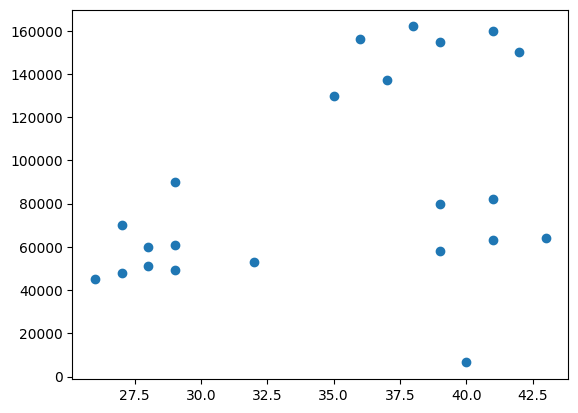

In [17]:
plt.scatter(Dataset['Age'],Dataset['Income($)'])

In [18]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [19]:
y_predicted = km.fit_predict(Dataset[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1],
      dtype=int32)

In [20]:
Dataset['cluster'] = y_predicted
Dataset.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Micheal,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


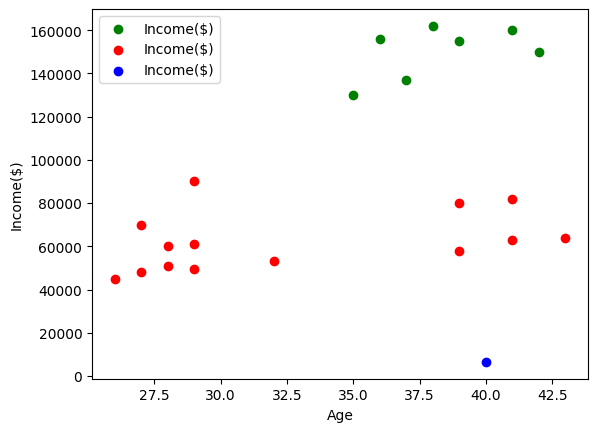

In [27]:
Dataset1 = Dataset[Dataset.cluster==0]
Dataset2 = Dataset[Dataset.cluster==1]
Dataset3 = Dataset[Dataset.cluster==2]

plt.scatter(Dataset1['Age'],Dataset1['Income($)'],color='green',label= 'Income($)')
plt.scatter(Dataset2['Age'],Dataset2['Income($)'],color='red',label= 'Income($)')
plt.scatter(Dataset3['Age'],Dataset3['Income($)'],color='blue',label= 'Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [35]:
scaler = MinMaxScaler()
scaler.fit(Dataset[['Income($)']])
Dataset['Income($)'] = scaler.transform(Dataset[['Income($)']])

scaler.fit(Dataset[['Age']])
Dataset['Age'] = scaler.transform(Dataset[['Age']])
Dataset

,Name,Age,Income($),cluster
0,Rob,0.058824,0.408360,1
1,Micheal,0.176471,0.536977,1
2,Mohan,0.176471,0.350482,1
3,Ismail,0.117647,0.344051,1
4,Kory,0.941176,0.922830,0
5,Gautam,0.764706,0.954984,0
6,Smita,0.882353,0.987138,0
7,David,0.705882,1.000000,0
8,Brad,0.588235,0.961415,0
9,Angelina,0.529412,0.794212,0


In [38]:
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(Dataset[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [39]:
Dataset['cluster'] = y_predicted
Dataset

,Name,Age,Income($),cluster
0,Rob,0.058824,0.408360,1
1,Micheal,0.176471,0.536977,1
2,Mohan,0.176471,0.350482,1
3,Ismail,0.117647,0.344051,1
4,Kory,0.941176,0.922830,0
5,Gautam,0.764706,0.954984,0
6,Smita,0.882353,0.987138,0
7,David,0.705882,1.000000,0
8,Brad,0.588235,0.961415,0
9,Angelina,0.529412,0.794212,0


In [41]:
km.cluster_centers_

array([[0.72268908, 0.92282958],
       [0.1372549 , 0.33511969],
       [0.85294118, 0.33708467]])

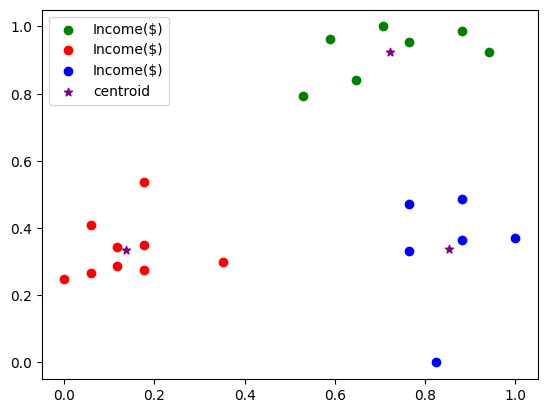

In [42]:
Dataset1 = Dataset[Dataset.cluster==0]
Dataset2 = Dataset[Dataset.cluster==1]
Dataset3 = Dataset[Dataset.cluster==2]

plt.scatter(Dataset1['Age'],Dataset1['Income($)'],color='green',label= 'Income($)')
plt.scatter(Dataset2['Age'],Dataset2['Income($)'],color='red',label= 'Income($)')
plt.scatter(Dataset3['Age'],Dataset3['Income($)'],color='blue',label= 'Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


In [44]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Dataset[['Age','Income($)']])
    sse.append(km.inertia_)

In [45]:
sse

[4.4323359432677,
 1.6804070200281445,
 0.517127501645093,
 0.4633270239268877,
 0.36033323627537023,
 0.2186069536121727,
 0.168012723289938,
 0.166117798459229,
 0.13030361278740515]

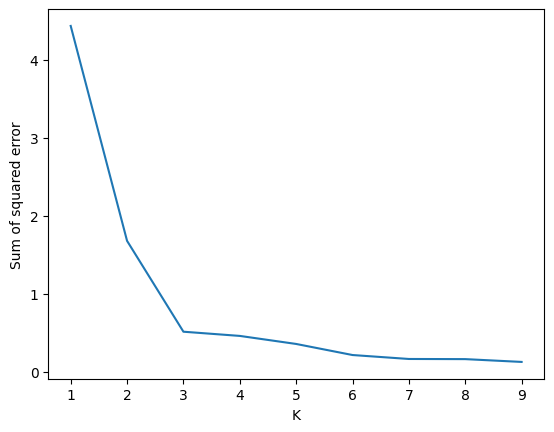

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)